# USE DNN MODEL

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Set device (cuda or cpu)

In [4]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

### Epoch과 Batch size 설정

In [5]:
EPOCHS = 35
BATCH_SIZE = 64

## CIFAR-100 데이터셋 다운로드

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|███████████████████████████████████████████████████████████████| 169001437/169001437 [2:23:07<00:00, 19678.79it/s]


Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified


## Define Neural Net

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 100)  # CIFAR-100의 클래스 수는 100개

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
model = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(),lr=0.01)

## Train / Evaluate

In [9]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE) # 학습 데이터를 DEVICE의 메모리로 보냄
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()


In [10]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측과 정답을 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
        test_loss /= len(test_loader.dataset)
        test_accuracy = 100. * correct / len(test_loader.dataset)
        return test_loss, test_accuracy

## Test

[1] Test Loss: 4.3881, Accuracy: 5.33%
[2] Test Loss: 4.0454, Accuracy: 8.52%
[3] Test Loss: 3.8822, Accuracy: 11.63%
[4] Test Loss: 3.7638, Accuracy: 13.75%
[5] Test Loss: 3.6881, Accuracy: 14.88%
[6] Test Loss: 3.6211, Accuracy: 15.54%
[7] Test Loss: 3.5730, Accuracy: 16.68%
[8] Test Loss: 3.5391, Accuracy: 17.07%
[9] Test Loss: 3.4965, Accuracy: 18.14%
[10] Test Loss: 3.4774, Accuracy: 18.34%
[11] Test Loss: 3.4421, Accuracy: 19.24%
[12] Test Loss: 3.4160, Accuracy: 19.49%
[13] Test Loss: 3.3897, Accuracy: 19.88%
[14] Test Loss: 3.3651, Accuracy: 20.45%
[15] Test Loss: 3.3440, Accuracy: 20.77%
[16] Test Loss: 3.3206, Accuracy: 21.39%
[17] Test Loss: 3.3006, Accuracy: 22.03%
[18] Test Loss: 3.2823, Accuracy: 22.51%
[19] Test Loss: 3.2687, Accuracy: 22.66%
[20] Test Loss: 3.2507, Accuracy: 23.00%
[21] Test Loss: 3.2465, Accuracy: 22.81%
[22] Test Loss: 3.2215, Accuracy: 23.98%
[23] Test Loss: 3.2034, Accuracy: 24.19%
[24] Test Loss: 3.1960, Accuracy: 24.23%
[25] Test Loss: 3.1875, Acc

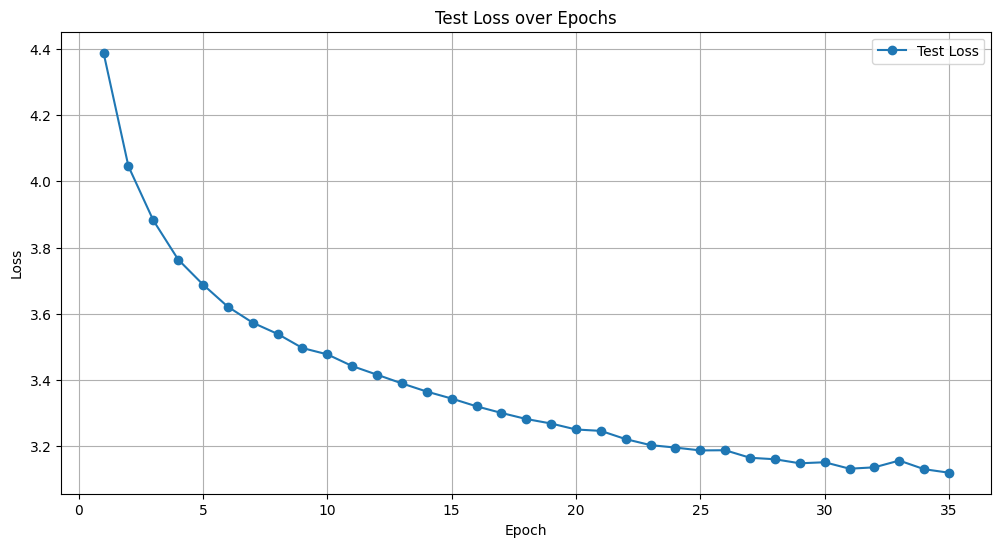

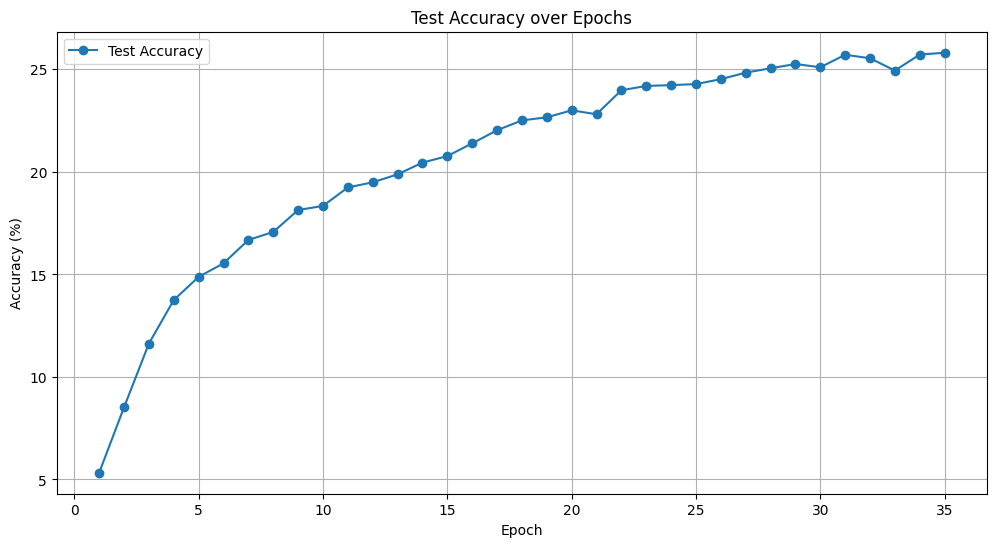

In [11]:
import matplotlib.pyplot as plt

# 에폭(epoch) 및 해당 Test Loss 및 Accuracy 데이터를 저장합니다.
epochs = range(1, EPOCHS + 1)
test_losses = []  # Test Loss 데이터를 저장할 리스트
test_accuracies = []  # Test Accuracy 데이터를 저장할 리스트

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, EPOCHS)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))
    
    # Test Loss 및 Accuracy를 리스트에 추가
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Test Loss 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_losses, label='Test Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Test Accuracy 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.grid(True)
plt.legend()
plt.show()


In [12]:
PATH = 'D:/jupyter/DeepLearning/20202114/model/'

torch.save(model, PATH + 'dnn_model.pt') 

# USE CNN MODEL

## Epoch과 Batch size 설정

In [13]:
EPOCHS = 50
BATCH_SIZE = 64

## Define CNN

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        
        self.fc1 = nn.Linear(1600, 160)  # 수정된 입력 크기
        self.fc2 = nn.Linear(160, 100)  # CIFAR-100에 맞는 출력 크기

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 1600)  # 수정된 입력 크기에 맞게 조정
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x


In [15]:
model = CNN().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Train

In [16]:

def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('훈련 에포크: {} [{}/{} ({:.0f}%)]\t손실: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))



## Evaluate

In [17]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

## Test

훈련 에포크: 50 [0/50000 (0%)]	손실: 4.615768
훈련 에포크: 50 [12800/50000 (26%)]	손실: 4.589103
훈련 에포크: 50 [25600/50000 (51%)]	손실: 4.586185
훈련 에포크: 50 [38400/50000 (77%)]	손실: 4.581682
[1] Test Loss: 4.5640, Accuracy: 2.39%
훈련 에포크: 50 [0/50000 (0%)]	손실: 4.562932
훈련 에포크: 50 [12800/50000 (26%)]	손실: 4.537519
훈련 에포크: 50 [25600/50000 (51%)]	손실: 4.482090
훈련 에포크: 50 [38400/50000 (77%)]	손실: 4.465166
[2] Test Loss: 4.3177, Accuracy: 5.73%
훈련 에포크: 50 [0/50000 (0%)]	손실: 4.249584
훈련 에포크: 50 [12800/50000 (26%)]	손실: 4.298395
훈련 에포크: 50 [25600/50000 (51%)]	손실: 4.224498
훈련 에포크: 50 [38400/50000 (77%)]	손실: 4.218595
[3] Test Loss: 4.1166, Accuracy: 8.58%
훈련 에포크: 50 [0/50000 (0%)]	손실: 3.972300
훈련 에포크: 50 [12800/50000 (26%)]	손실: 4.163205
훈련 에포크: 50 [25600/50000 (51%)]	손실: 4.167552
훈련 에포크: 50 [38400/50000 (77%)]	손실: 4.086156
[4] Test Loss: 4.0029, Accuracy: 9.77%
훈련 에포크: 50 [0/50000 (0%)]	손실: 4.207779
훈련 에포크: 50 [12800/50000 (26%)]	손실: 4.285568
훈련 에포크: 50 [25600/50000 (51%)]	손실: 4.082074
훈련 에포크: 50 [38400/50000 (77%)]	손실

[39] Test Loss: 2.8351, Accuracy: 31.65%
훈련 에포크: 50 [0/50000 (0%)]	손실: 2.927571
훈련 에포크: 50 [12800/50000 (26%)]	손실: 2.998404
훈련 에포크: 50 [25600/50000 (51%)]	손실: 3.275417
훈련 에포크: 50 [38400/50000 (77%)]	손실: 3.405678
[40] Test Loss: 2.8430, Accuracy: 31.79%
훈련 에포크: 50 [0/50000 (0%)]	손실: 3.383612
훈련 에포크: 50 [12800/50000 (26%)]	손실: 3.424447
훈련 에포크: 50 [25600/50000 (51%)]	손실: 3.207521
훈련 에포크: 50 [38400/50000 (77%)]	손실: 2.960598
[41] Test Loss: 2.8055, Accuracy: 32.04%
훈련 에포크: 50 [0/50000 (0%)]	손실: 2.946797
훈련 에포크: 50 [12800/50000 (26%)]	손실: 3.206265
훈련 에포크: 50 [25600/50000 (51%)]	손실: 3.255991
훈련 에포크: 50 [38400/50000 (77%)]	손실: 3.218530
[42] Test Loss: 2.8022, Accuracy: 32.15%
훈련 에포크: 50 [0/50000 (0%)]	손실: 3.125070
훈련 에포크: 50 [12800/50000 (26%)]	손실: 2.854394
훈련 에포크: 50 [25600/50000 (51%)]	손실: 3.082259
훈련 에포크: 50 [38400/50000 (77%)]	손실: 2.938668
[43] Test Loss: 2.7922, Accuracy: 32.72%
훈련 에포크: 50 [0/50000 (0%)]	손실: 2.982926
훈련 에포크: 50 [12800/50000 (26%)]	손실: 3.291711
훈련 에포크: 50 [25600/50000 (51%

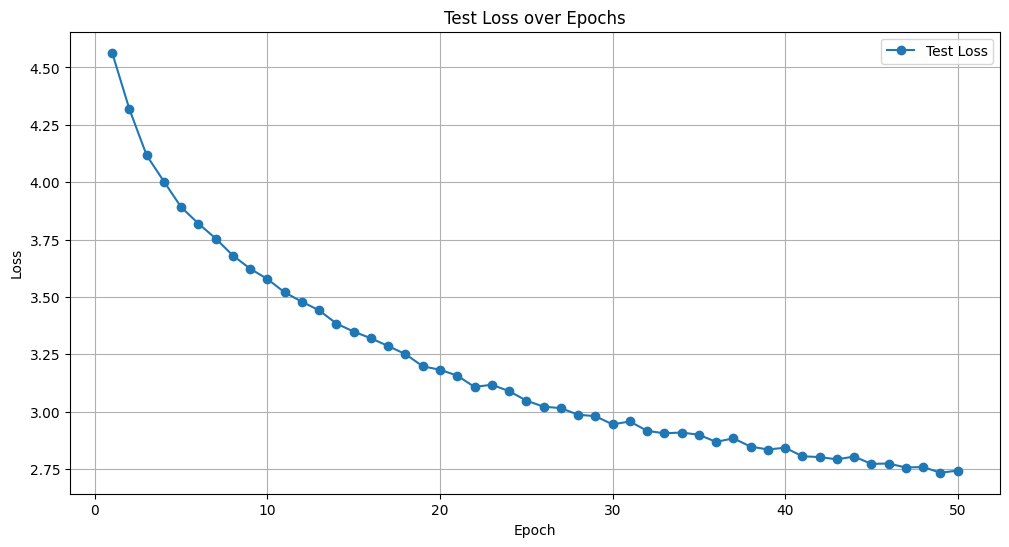

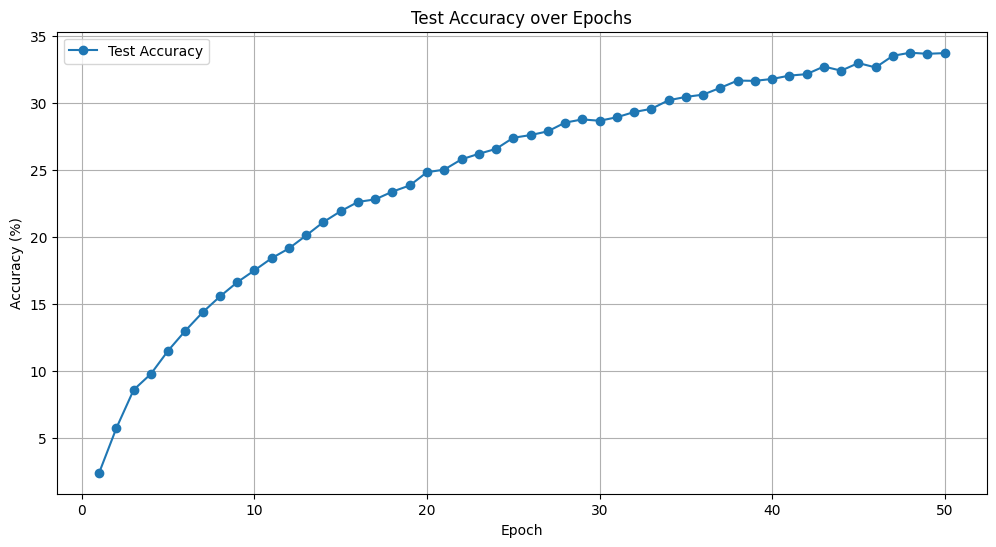

In [18]:
import matplotlib.pyplot as plt

# 에폭(epoch) 및 해당 Test Loss 및 Accuracy 데이터를 저장합니다.
epochs = range(1, EPOCHS + 1)
test_losses = []  # Test Loss 데이터를 저장할 리스트
test_accuracies = []  # Test Accuracy 데이터를 저장할 리스트

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, EPOCHS)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))
    
    # Test Loss 및 Accuracy를 리스트에 추가
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Test Loss 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_losses, label='Test Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Test Accuracy 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.grid(True)
plt.legend()
plt.show()


## 모델 저장

In [19]:
PATH = 'D:/jupyter/DeepLearning/20202114/model/'

torch.save(model, PATH + 'cnn_model.pt')  

# Use ResNet

## Epoch과 Batch size 설정하기

In [20]:
EPOCHS = 40
BATCH_SIZE = 128

## ResNet

In [21]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3,
        stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
        stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
            nn.Conv2d(in_planes, planes,
            kernel_size=1, stride=stride, bias=False),
            nn.BatchNorm2d(planes)
            )
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [22]:
class ResNet(nn.Module):
    def __init__(self, num_classes=100):
        super(ResNet, self).__init__()
        self.in_planes = 16
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride=1)
        self.layer2 = self._make_layer(32, 2, stride=2)
        self.layer3 = self._make_layer(64, 2, stride=2)
        self.linear = nn.Linear(64, num_classes)
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [23]:
model = ResNet().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

## Train & Evaluate

In [24]:
def train(model, train_loader, optimizer, epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE) # 학습 데이터를 DEVICE의 메모리로 보냄
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()


In [25]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

## Test

[1] Test Loss: 3.5472, Accuracy: 14.48%
[2] Test Loss: 3.1829, Accuracy: 20.97%
[3] Test Loss: 2.7293, Accuracy: 30.20%
[4] Test Loss: 2.6014, Accuracy: 32.18%
[5] Test Loss: 2.4234, Accuracy: 36.79%
[6] Test Loss: 2.4841, Accuracy: 36.19%
[7] Test Loss: 2.4385, Accuracy: 37.75%
[8] Test Loss: 2.2393, Accuracy: 40.41%
[9] Test Loss: 2.3353, Accuracy: 38.90%
[10] Test Loss: 2.4493, Accuracy: 37.66%
[11] Test Loss: 2.3788, Accuracy: 37.88%
[12] Test Loss: 2.2322, Accuracy: 41.32%
[13] Test Loss: 2.2723, Accuracy: 41.19%
[14] Test Loss: 2.1740, Accuracy: 42.04%
[15] Test Loss: 2.1029, Accuracy: 43.36%
[16] Test Loss: 2.1998, Accuracy: 41.64%
[17] Test Loss: 2.2398, Accuracy: 41.31%
[18] Test Loss: 2.0774, Accuracy: 43.44%
[19] Test Loss: 2.3749, Accuracy: 37.95%
[20] Test Loss: 2.3485, Accuracy: 38.79%
[21] Test Loss: 2.3366, Accuracy: 38.22%
[22] Test Loss: 2.1921, Accuracy: 41.96%
[23] Test Loss: 2.3370, Accuracy: 38.72%
[24] Test Loss: 2.0881, Accuracy: 44.44%
[25] Test Loss: 2.1655, A

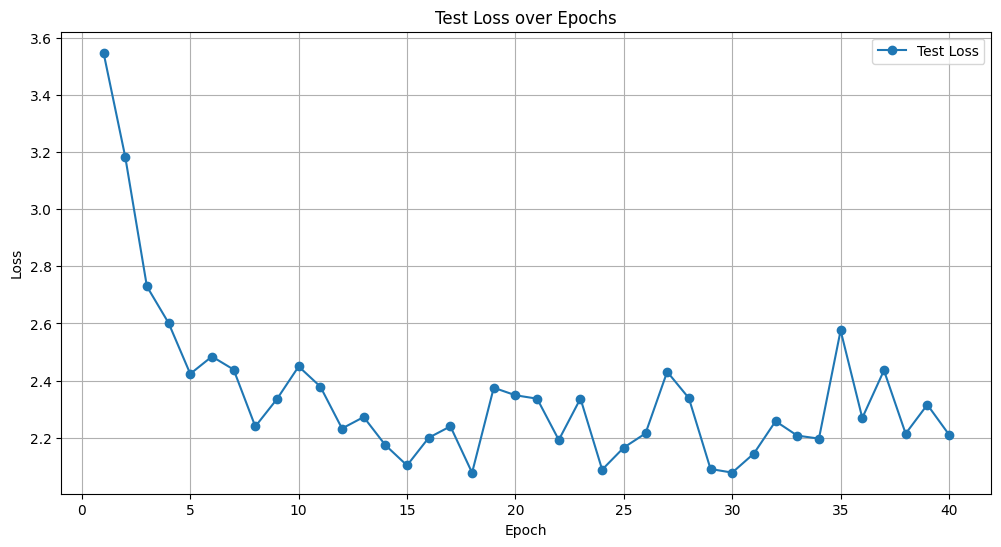

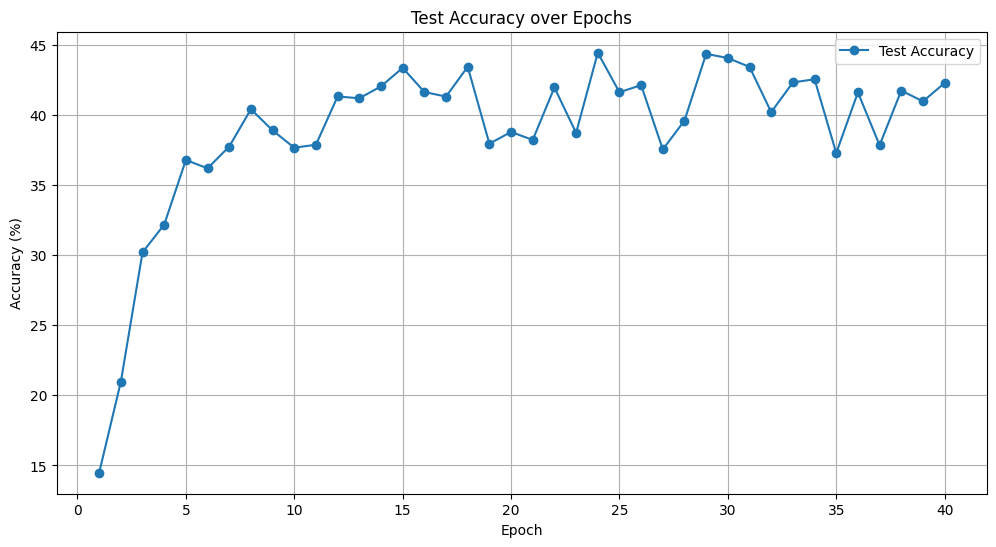

In [26]:
import matplotlib.pyplot as plt

# 에폭(epoch) 및 해당 Test Loss 및 Accuracy 데이터를 저장합니다.
epochs = range(1, EPOCHS + 1)
test_losses = []  # Test Loss 데이터를 저장할 리스트
test_accuracies = []  # Test Accuracy 데이터를 저장할 리스트

for epoch in range(1, EPOCHS + 1):
    
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))
    
    # Test Loss 및 Accuracy를 리스트에 추가
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Test Loss 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_losses, label='Test Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Test Accuracy 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.grid(True)
plt.legend()
plt.show()


## 모델 저장

In [27]:
PATH = 'D:/jupyter/DeepLearning/20202114/model/'

torch.save(model, PATH + 'ResNet_model.pt') 

# Custom Model

## Epoch과 Batch size 설정하기

In [28]:
EPOCHS = 40
BATCH_SIZE = 128

## Custom Model

In [29]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3,
        stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
        stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
            nn.Conv2d(in_planes, planes,
            kernel_size=1, stride=stride, bias=False),
            nn.BatchNorm2d(planes)
            )
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [30]:
class Custom(nn.Module):
    def __init__(self, num_classes=100):
        super(Custom, self).__init__()
        self.in_planes = 16
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride=1)
        self.layer2 = self._make_layer(32, 2, stride=1)
        self.layer3 = self._make_layer(64, 2, stride=2)
        self.layer4 = self._make_layer(128, 2, stride=2)

        self.linear = nn.Linear(128, num_classes)
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [31]:
model = Custom().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

## Train & Evaluate

In [32]:
def train(model, train_loader, optimizer, epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE) # 학습 데이터를 DEVICE의 메모리로 보냄
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [33]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

## Test

[1] Test Loss: 3.7097, Accuracy: 11.61%
[2] Test Loss: 3.1516, Accuracy: 22.73%
[3] Test Loss: 2.7581, Accuracy: 29.54%
[4] Test Loss: 2.2723, Accuracy: 38.79%
[5] Test Loss: 2.2018, Accuracy: 40.78%
[6] Test Loss: 2.0956, Accuracy: 44.10%
[7] Test Loss: 2.0864, Accuracy: 44.43%
[8] Test Loss: 1.9830, Accuracy: 47.30%
[9] Test Loss: 1.8288, Accuracy: 50.19%
[10] Test Loss: 1.8572, Accuracy: 49.89%
[11] Test Loss: 2.0409, Accuracy: 47.54%
[12] Test Loss: 1.8031, Accuracy: 51.12%
[13] Test Loss: 1.9231, Accuracy: 49.00%
[14] Test Loss: 1.9022, Accuracy: 49.84%
[15] Test Loss: 1.8272, Accuracy: 50.57%
[16] Test Loss: 1.9659, Accuracy: 48.69%
[17] Test Loss: 1.9786, Accuracy: 48.70%
[18] Test Loss: 1.9152, Accuracy: 49.90%
[19] Test Loss: 2.0313, Accuracy: 47.30%
[20] Test Loss: 1.9255, Accuracy: 49.34%
[21] Test Loss: 2.0096, Accuracy: 49.26%
[22] Test Loss: 1.8689, Accuracy: 50.84%
[23] Test Loss: 1.9045, Accuracy: 50.48%
[24] Test Loss: 1.9795, Accuracy: 49.25%
[25] Test Loss: 1.7871, A

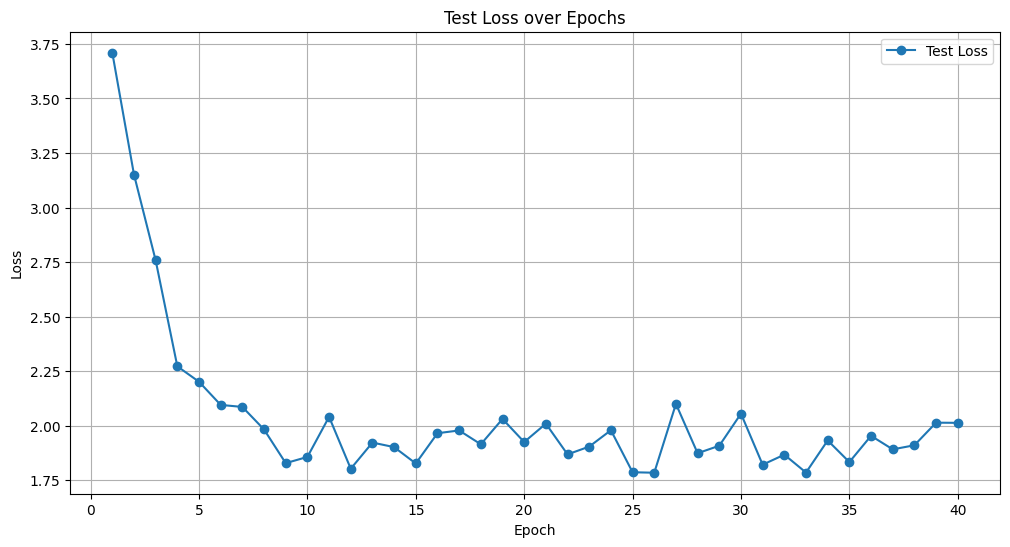

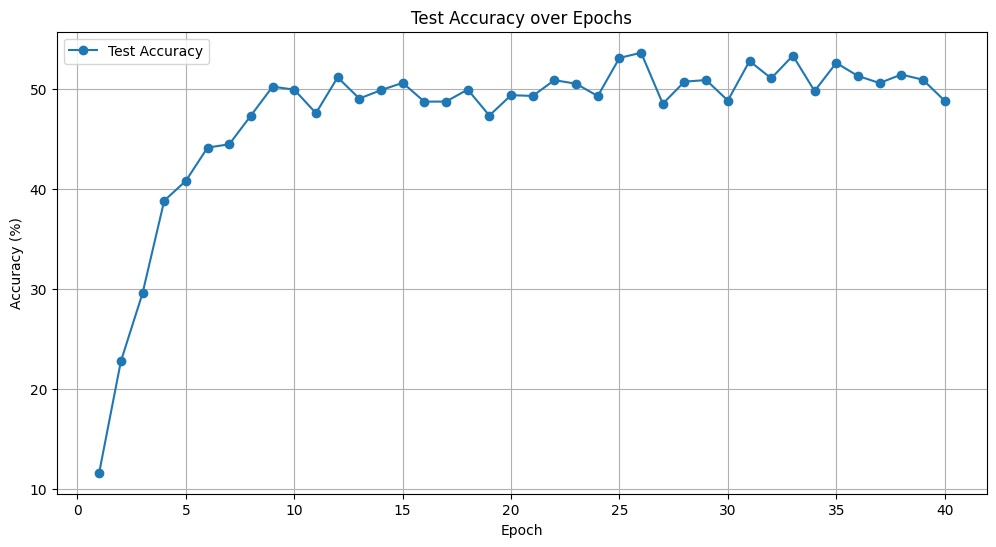

In [34]:
import matplotlib.pyplot as plt

# 에폭(epoch) 및 해당 Test Loss 및 Accuracy 데이터를 저장합니다.
epochs = range(1, EPOCHS + 1)
test_losses = []  # Test Loss 데이터를 저장할 리스트
test_accuracies = []  # Test Accuracy 데이터를 저장할 리스트

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))
    
    # Test Loss 및 Accuracy를 리스트에 추가
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Test Loss 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_losses, label='Test Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Test Accuracy 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.grid(True)
plt.legend()
plt.show()

## 모델 저장

In [35]:
PATH = 'D:/jupyter/DeepLearning/20202114/model/'

torch.save(model, PATH + 'Custom_model.pt') 